In [17]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

root_path = Path().cwd().parent.parent
data_path = root_path / "common" / "resources" / "datasets"
figures_path = Path().resolve() / 'week_2' / 'figures'

In [18]:
def preprocess(data: pd.DataFrame) -> pd.DataFrame:
    data = data.copy()

    data.columns = [col.lower() for col in data.columns]

    data = data.dropna(
        subset=[
            "platform",
            "year_of_release",
            "global_sales",
            "eu_sales",
            "jp_sales",
            "na_sales",
            "other_sales",
        ],
    )

    data["year_of_release"] = data["year_of_release"].astype("int")

    return data

In [19]:
dataset_path = data_path / "games.csv"
games = pd.read_csv(dataset_path)
games = preprocess(games)
games

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/88/v121ppv51ll0mnt90th9d_4r0000gp/T/ipykernel_65527/2885571318.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


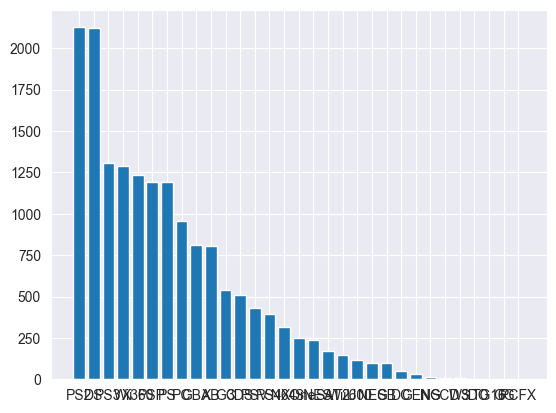

In [20]:
platform_count = games['platform'].value_counts().reset_index()

fig, ax = plt.subplots()
ax.bar("platform", "count", data=platform_count)
fig.show()

/var/folders/88/v121ppv51ll0mnt90th9d_4r0000gp/T/ipykernel_65527/1020156345.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


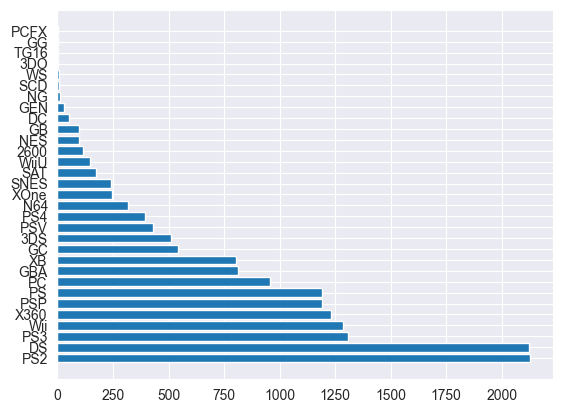

In [21]:
fig, ax = plt.subplots()
ax.barh("platform", "count", data=platform_count)
fig.show()

/var/folders/88/v121ppv51ll0mnt90th9d_4r0000gp/T/ipykernel_65527/932154333.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


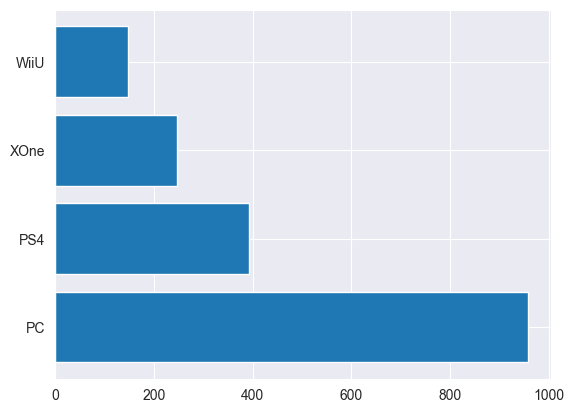

In [22]:
filtered_platform_count = platform_count[platform_count['platform'].isin(['PS4', 'XOne', 'WiiU', 'PC'])]

fig, ax = plt.subplots()
ax.barh("platform", "count", data=filtered_platform_count)
fig.show()

/var/folders/88/v121ppv51ll0mnt90th9d_4r0000gp/T/ipykernel_65527/2111452250.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


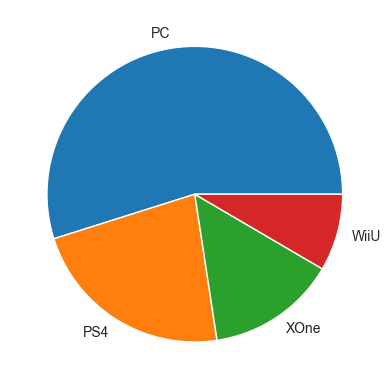

In [23]:
fig, ax = plt.subplots()
ax.pie("count", labels="platform", data=filtered_platform_count)
fig.show()

/var/folders/88/v121ppv51ll0mnt90th9d_4r0000gp/T/ipykernel_65527/361723921.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


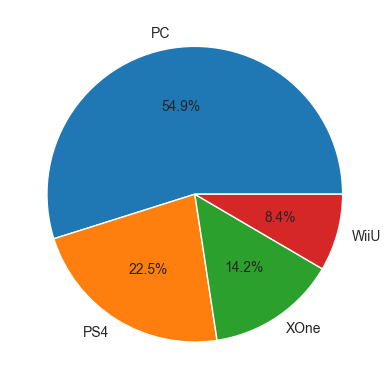

In [24]:
fig, ax = plt.subplots()
ax.pie("count", labels="platform", data=filtered_platform_count, autopct='%1.1f%%')
fig.show()

In [25]:
def add_decades(data: pd.DataFrame) -> pd.DataFrame:
    data = data.copy()

    decade_bins = (
        np.array(range(data["year_of_release"].min() // 10 * 10, data["year_of_release"].max() // 10 * 10 + 11, 10)) - 1
    )

    # Dropping the last decade because of incomplete sales data
    decade_bins = decade_bins[:-1]
    decade_labels = np.array(decade_bins[:-1]) + 1

    data["decade"] = pd.cut(data["year_of_release"], bins=decade_bins, labels=decade_labels, right=True)
    return data[data["decade"].notna()]


def extract_sales_region(data: pd.DataFrame) -> pd.DataFrame:
    sales_columns = {"eu_sales", "jp_sales", "na_sales", "other_sales"}
    other_columns = set(data.columns.unique()).difference(sales_columns)

    data = data.melt(id_vars=other_columns, value_vars=sales_columns, value_name="sales", var_name="region")
    data["region"] = data["region"].str.replace("_sales", "")

    return data

In [26]:
games_with_decades_and_sales = add_decades(games)
games_with_decades_and_sales = extract_sales_region(games_with_decades_and_sales)
aggregated_games_by_decade_and_region = games_with_decades_and_sales.groupby(['decade', 'region'])['sales'].sum().reset_index()

/var/folders/88/v121ppv51ll0mnt90th9d_4r0000gp/T/ipykernel_65527/3974848976.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_games_by_decade_and_region = games_with_decades_and_sales.groupby(['decade', 'region'])['sales'].sum().reset_index()


/var/folders/88/v121ppv51ll0mnt90th9d_4r0000gp/T/ipykernel_65527/2325644654.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


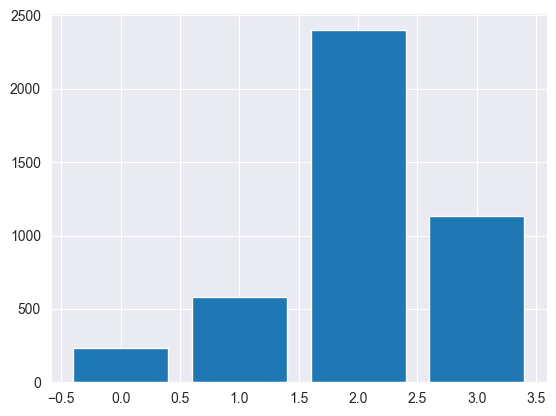

In [27]:
def _get_number_of_decades(data: pd.DataFrame):
    return data['decade'].nunique()


def _get_region_sales(data: pd.DataFrame, region: str):
    return data[data['region'] == region]['sales']


def plot_region(ax, data: pd.DataFrame, region: str, trace: int = 0):
    number_of_decades = _get_number_of_decades(data)
    region_sales = _get_region_sales(data, region)
    
    ax.bar(np.arange(number_of_decades), region_sales)


fig, ax = plt.subplots()
plot_region(ax, aggregated_games_by_decade_and_region, 'na')
fig.show()

/var/folders/88/v121ppv51ll0mnt90th9d_4r0000gp/T/ipykernel_65527/389539266.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


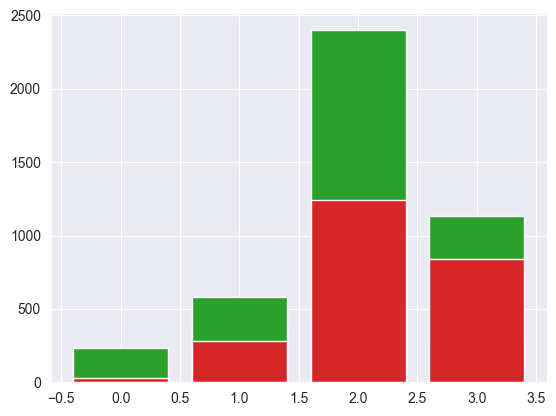

In [28]:
def _get_number_of_decades(data: pd.DataFrame):
    return data['decade'].nunique()


def _get_region_sales(data: pd.DataFrame, region: str):
    return data[data['region'] == region]['sales']


def _get_all_regions(data: pd.DataFrame):
    return set(data['region'].unique())


def plot_region(ax, data: pd.DataFrame, region: str, trace: int = 0):
    number_of_decades = _get_number_of_decades(data)
    region_sales = _get_region_sales(data, region)
    ax.bar(np.arange(number_of_decades), region_sales)


fig, ax = plt.subplots()

for region in _get_all_regions(aggregated_games_by_decade_and_region):
    plot_region(ax, aggregated_games_by_decade_and_region, region)

fig.show()

/var/folders/88/v121ppv51ll0mnt90th9d_4r0000gp/T/ipykernel_65527/1085833316.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


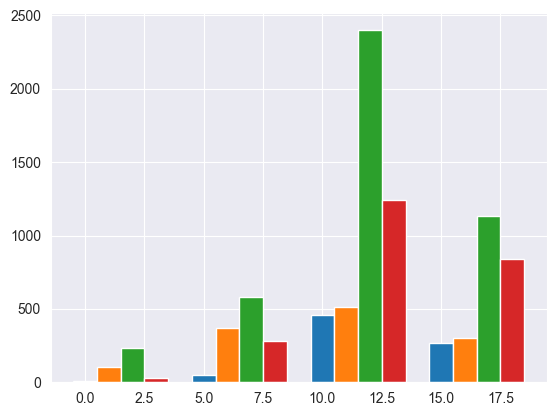

In [29]:
def _get_number_of_decades(data: pd.DataFrame):
    return data['decade'].nunique()


def _get_number_of_regions(data: pd.DataFrame):
    return data['region'].nunique()


def _get_region_sales(data: pd.DataFrame, region: str):
    return data[data['region'] == region]['sales']


def _get_all_regions(data: pd.DataFrame):
    return set(data['region'].unique())


def plot_region(ax: plt.Axes, data: pd.DataFrame, region: str, trace: int = 0):
    number_of_decades = _get_number_of_decades(data)
    number_of_regions = _get_number_of_regions(data) + 1
    region_sales = _get_region_sales(data, region)    
        
    ax.bar(np.arange(0, number_of_decades * number_of_regions, number_of_regions) + trace, region_sales, 1)


fig, ax = plt.subplots()

for i, region in enumerate(_get_all_regions(aggregated_games_by_decade_and_region)):
    plot_region(ax, aggregated_games_by_decade_and_region, region, i)

fig.show()

/var/folders/88/v121ppv51ll0mnt90th9d_4r0000gp/T/ipykernel_65527/3836839234.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


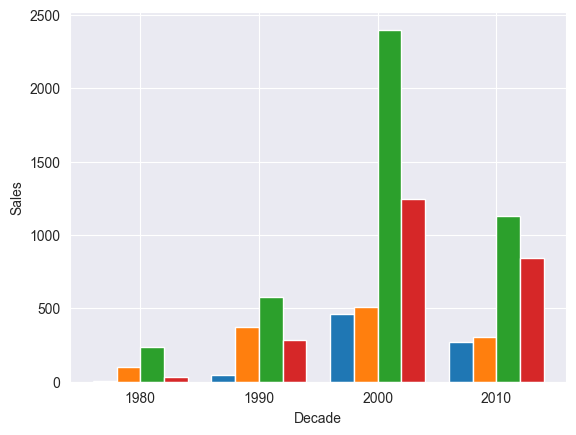

In [30]:
def _get_number_of_decades(data: pd.DataFrame):
    return data['decade'].nunique()


def _get_number_of_regions(data: pd.DataFrame):
    return data['region'].nunique()


def _get_region_sales(data: pd.DataFrame, region: str):
    return data[data['region'] == region]['sales']


def _get_all_regions(data: pd.DataFrame):
    return set(data['region'].unique())


def _get_all_decades(data: pd.DataFrame):
    return list(data['decade'].unique())


def plot_region(ax, data: pd.DataFrame, region: str, trace: int = 0):
    number_of_decades = _get_number_of_decades(data)
    number_of_regions = _get_number_of_regions(data)
    region_sales = _get_region_sales(data, region)    
    
    width = 1 / (number_of_regions + 1)
    ax.bar([x + width * trace for x in range(number_of_decades)], region_sales, width)


fig, ax = plt.subplots()

for i, region in enumerate(_get_all_regions(aggregated_games_by_decade_and_region)):
    plot_region(ax, aggregated_games_by_decade_and_region, region, i)

ax.set_xlabel('Decade')
ax.set_ylabel('Sales')

number_of_decades = _get_number_of_decades(aggregated_games_by_decade_and_region)
number_of_regions = _get_number_of_regions(aggregated_games_by_decade_and_region)

width = 1 / (number_of_regions + 1)

ax.set_xticks(np.arange(number_of_decades) + width * (number_of_regions - 1) / 2, _get_all_decades(aggregated_games_by_decade_and_region))

fig.show()

/var/folders/88/v121ppv51ll0mnt90th9d_4r0000gp/T/ipykernel_65527/718318917.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


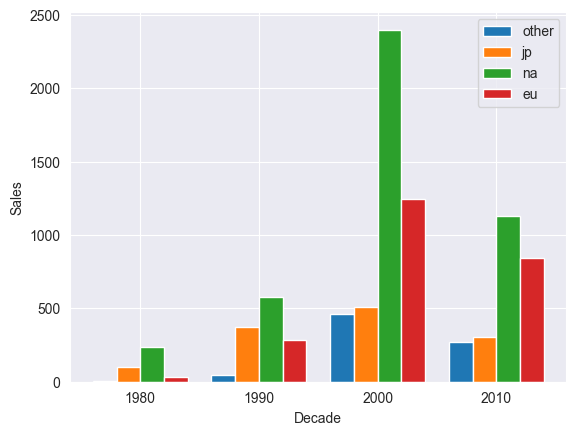

In [31]:
def plot_region(ax, data: pd.DataFrame, region: str, trace: int = 0):
    number_of_regions = data['region'].nunique()
    number_of_decades = data['decade'].nunique()
    
    width = 1 / (number_of_decades + 1)
    offset = width * trace
    
    region_data = data[data['region'] == region]
    ax.bar(np.arange(number_of_regions) + offset, region_data['sales'], width=width, label=region)
    

fig, ax = plt.subplots()

regions = set(aggregated_games_by_decade_and_region['region'].unique())
for i, region in enumerate(regions):
    plot_region(ax, aggregated_games_by_decade_and_region, region, i)

ax.set_xlabel('Decade')
ax.set_ylabel('Sales')

number_of_decades = _get_number_of_decades(aggregated_games_by_decade_and_region)
number_of_regions = _get_number_of_regions(aggregated_games_by_decade_and_region)

width = 1 / (number_of_regions + 1)

ax.set_xticks(np.arange(number_of_decades) + width * (number_of_regions - 1) / 2, _get_all_decades(aggregated_games_by_decade_and_region))

ax.legend()

fig.show()